# Comparaisons théoriques et expérimentales

Ce notebook se portera uniquement sur les questions n°2 et n°11

In [1]:
from time import time
from random import *
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel

### Q2 :
#### Comparaison des fonctions create_network et dico_reseau

##### Théorique
create_network() possède une compléxité linéaire.

dico_reseau() possède une compléxité quadratique.

##### Expérimental

In [6]:
from community_detection import *

amis = lecture_reseau("files/Communaute1.csv")

def mesure_create_network(n):
    temps = 0.
    i = 0
    while i < n:
        depart = time()
        create_network(amis)
        temps += time()-depart
        i += 1
    return 1000 * temps / n

def mesure_dico_reseau(n):
    temps = 0.
    i = 0
    while i < n:
        depart = time()
        dico_reseau(amis)
        temps += time()-depart
        i += 1
    return 1000 * temps / n
 
tailles = [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800, 5100, 5400, 5700, 6000, 6300, 6600, 6900, 7200, 7500, 7800, 8100, 8400, 8700, 9000, 9300, 9600, 9900]
tps1 = []
tps2 = []
i = 0
while i < len(tailles):
    tps1.append(mesure_create_network(tailles[i]))
    tps2.append(mesure_dico_reseau(tailles[i]))
    i += 1

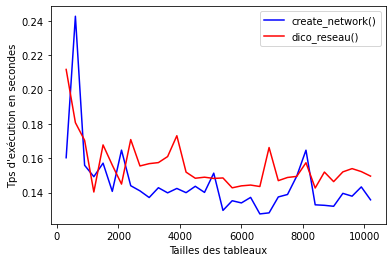

In [11]:
%matplotlib inline

plot(tailles, tps1, "b", label="create_network()")
plot(tailles, tps2, "r", label="dico_reseau()")


xlabel("Tailles des tableaux")
ylabel("Tps d'exécution en secondes")
legend()

### Q11 :
#### Comparaison des fonctions find_community_by_decreasing_popularity et find_community_from_person

##### Théorique
find_community_by_decreasing_popularity() possède une compléxité quadratique.

find_community_from_person() possède une compléxité quadratique.

##### Expérimental

In [8]:
from community_detection import *
from random import randint

amis = lecture_reseau("files/Communaute1.csv")
dic_res = create_network(amis)

def mesure_find_community_by_decreasing_popularity(n):
    temps = 0.
    i = 0
    while i < n:
        depart = time()
        find_community_by_decreasing_popularity(dic_res)
        temps += time()-depart
        i += 1
    return 1000 * temps / n

def mesure_find_community_from_person(n):
    temps = 0.
    i = 0
    while i < n:
        depart = time()
        find_community_from_person(dic_res, 'Barbra')
        temps += time()-depart
        i += 1
    return 1000 * temps / n
tailles = [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 3900, 4200, 4500, 4800, 5100, 5400, 5700, 6000, 6300, 6600, 6900, 7200, 7500, 7800, 8100, 8400, 8700, 9000, 9300, 9600, 9900, 10200]
tps1 = []
tps2 = []
i = 0
while i < len(tailles):
    tps1.append(mesure_find_community_by_decreasing_popularity(tailles[i]))
    tps2.append(mesure_find_community_from_person(tailles[i]))
    i += 1

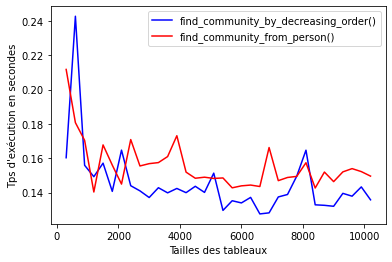

In [9]:
%matplotlib inline

plot(tailles, tps1, "b", label="find_community_by_decreasing_order()")
plot(tailles, tps2, "r", label="find_community_from_person()")


xlabel("Tailles des tableaux")
ylabel("Tps d'exécution en secondes")
legend()